In [13]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Marketing Campaign Dataset.xlsx')

In [3]:
df.head()

,Campaign,Date,City/Location,Latitude,Longitude,Channel,Device,Ad,Impressions,"CTR, %",Clicks,Daily Average CPC,"Spend, GBP",Conversions,"Total conversion value, GBP",Likes (Reactions),Shares,Comments
0,Spring,2023-03-01,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1110.8,0.0185,20.54980,1.3915,28.595047,1,51.840,45.0,4.0,3.0
1,Spring,2023-03-02,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1296.6,0.0110,14.26260,0.7245,10.333254,2,40.320,14.0,17.0,10.5
2,Spring,2023-03-03,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1264.4,0.0132,16.69008,0.3795,6.333885,4,53.760,24.0,1.0,7.5
3,Spring,2023-03-04,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,837.8,0.0159,13.32102,0.5750,7.659586,3,25.920,59.0,10.0,6.0
4,Spring,2023-03-05,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1599.0,0.0144,23.02560,0.8280,19.065197,2,108.192,44.0,17.0,1.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Campaign                     9900 non-null   object        
 1   Date                         9900 non-null   datetime64[ns]
 2   City/Location                9900 non-null   object        
 3   Latitude                     9900 non-null   float64       
 4   Longitude                    9900 non-null   float64       
 5   Channel                      9900 non-null   object        
 6   Device                       9900 non-null   object        
 7   Ad                           9900 non-null   object        
 8   Impressions                  9900 non-null   float64       
 9   CTR, %                       9900 non-null   float64       
 10  Clicks                       9900 non-null   float64       
 11  Daily Average CPC            9900 non-null 

In [9]:
# Calculate Revenue 
df['Revenue'] = df['Total conversion value, GBP']

In [10]:
# Calculate Profit
df['Profit'] = df['Revenue'] - df['Spend, GBP']

In [11]:
# Calculate ROI %
df['ROI_%'] = (df['Profit'] / df['Spend, GBP']) * 100

In [14]:
# Replace infinite values with 0 (in case spend was 0)
df['ROI_%'] = df['ROI_%'].replace([np.inf, -np.inf], 0)

In [16]:
print(f"ROI Statistics:")
print(f"Average ROI: {df['ROI_%'].mean():.2f}%")
print(f"Median ROI: {df['ROI_%'].median():.2f}%")
print(f"Min ROI: {df['ROI_%'].min():.2f}%")
print(f"Max ROI: {df['ROI_%'].max():.2f}%")

ROI Statistics:
Average ROI: 5928.61%
Median ROI: 988.48%
Min ROI: -100.00%
Max ROI: 5307635.74%


In [18]:
print("First 10 rows with ROI:")
print(df[['Campaign', 'Channel', 'Spend, GBP', 'Revenue', 'Profit', 'ROI_%']].head(10))

First 10 rows with ROI:
  Campaign   Channel  Spend, GBP  Revenue     Profit       ROI_%
0  Spring   Facebook   28.595047   51.840  23.244953   81.290139
1  Spring   Facebook   10.333254   40.320  29.986746  290.196555
2  Spring   Facebook    6.333885   53.760  47.426115  748.768125
3  Spring   Facebook    7.659586   25.920  18.260414  238.399468
4  Spring   Facebook   19.065197  108.192  89.126803  467.484307
5  Spring   Facebook    5.327286   20.160  14.832714  278.429108
6  Spring   Facebook   34.642808   14.400 -20.242808  -58.432931
7  Spring   Facebook    4.283211   23.040  18.756789  437.914211
8  Spring   Facebook    2.812875   13.440  10.627125  377.803011
9  Spring   Facebook    7.154355    0.000  -7.154355 -100.000000


In [19]:
# Create the target: High_ROI (1 if ROI > 1000%, else 0)
df['High_ROI'] = (df['ROI_%'] > 1000).astype(int)

In [22]:
# Check the distribution
print(f"Target Distribution:")
print(df['High_ROI'].value_counts())
print(f"Percentage:")
print(df['High_ROI'].value_counts(normalize=True) * 100)

Target Distribution:
High_ROI
0    4981
1    4919
Name: count, dtype: int64
Percentage:
High_ROI
0    50.313131
1    49.686869
Name: proportion, dtype: float64


In [23]:
high_roi_examples = df[df['High_ROI'] == 1][['Campaign', 'Channel', 'Device', 'Spend, GBP', 'Revenue', 'ROI_%', 'High_ROI']].head(5)
print(high_roi_examples)

   Campaign   Channel   Device  Spend, GBP  Revenue        ROI_%  High_ROI
12  Spring   Facebook  Desktop    2.626416  162.624  6091.859934         1
14  Spring   Facebook  Desktop    5.586870  115.584  1968.850727         1
16  Spring   Facebook  Desktop    5.233801   68.544  1209.640958         1
22  Spring   Facebook  Desktop    1.749589   58.464  3241.585101         1
23  Spring   Facebook  Desktop    2.281042   49.920  2088.473936         1


In [24]:
low_roi_examples = df[df['High_ROI'] == 0][['Campaign', 'Channel', 'Device', 'Spend, GBP', 'Revenue', 'ROI_%', 'High_ROI']].head(5)
print(low_roi_examples)

  Campaign   Channel   Device  Spend, GBP  Revenue       ROI_%  High_ROI
0  Spring   Facebook  Desktop   28.595047   51.840   81.290139         0
1  Spring   Facebook  Desktop   10.333254   40.320  290.196555         0
2  Spring   Facebook  Desktop    6.333885   53.760  748.768125         0
3  Spring   Facebook  Desktop    7.659586   25.920  238.399468         0
4  Spring   Facebook  Desktop   19.065197  108.192  467.484307         0


In [25]:
df.to_csv('marketing_data_with_target.csv', index=False)

In [43]:
df.head()

,Campaign,City/Location,Latitude,Longitude,Channel,Device,Ad,Impressions,"CTR, %",Clicks,...,"Spend, GBP",Likes (Reactions),Shares,Comments,High_ROI,Month,Day_of_Week,Week_of_Year,Total_Engagement,Engagement_Rate
0,Spring,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1110.8,0.0185,20.54980,...,28.595047,45.0,4.0,3.0,0,3,2,9,52.0,4.681311
1,Spring,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1296.6,0.0110,14.26260,...,10.333254,14.0,17.0,10.5,0,3,3,9,41.5,3.200679
2,Spring,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1264.4,0.0132,16.69008,...,6.333885,24.0,1.0,7.5,0,3,4,9,32.5,2.570389
3,Spring,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,837.8,0.0159,13.32102,...,7.659586,59.0,10.0,6.0,0,3,5,9,75.0,8.952017
4,Spring,Birmingham,52.489471,-1.898575,Facebook,Desktop,Collection,1599.0,0.0144,23.02560,...,19.065197,44.0,17.0,1.5,0,3,6,9,62.5,3.908693


In [27]:
#FEATURE ENGINEERING

In [28]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.dayofweek  # 0=Monday, 6=Sunday
df['Week_of_Year'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [29]:
df['Total_Engagement'] = df['Likes (Reactions)'] + df['Shares'] + df['Comments']
df['Engagement_Rate'] = (df['Total_Engagement'] / df['Impressions']) * 100

In [35]:
df.drop(['Date', 'Conversions', 'Total conversion value, GBP', 'Revenue', 'Profit', 'ROI_%'], axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign           9900 non-null   object 
 1   City/Location      9900 non-null   object 
 2   Latitude           9900 non-null   float64
 3   Longitude          9900 non-null   float64
 4   Channel            9900 non-null   object 
 5   Device             9900 non-null   object 
 6   Ad                 9900 non-null   object 
 7   Impressions        9900 non-null   float64
 8   CTR, %             9900 non-null   float64
 9   Clicks             9900 non-null   float64
 10  Daily Average CPC  9900 non-null   float64
 11  Spend, GBP         9900 non-null   float64
 12  Likes (Reactions)  9900 non-null   float64
 13  Shares             9900 non-null   float64
 14  Comments           9900 non-null   float64
 15  High_ROI           9900 non-null   int64  
 16  Month              9900 

In [38]:
X = df.drop('High_ROI', axis=1)
y = df['High_ROI']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [44]:
num_cols = X_train.select_dtypes(include=['int64', 'float64', 'UInt32', 'int32']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),                  
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  
    ]
)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [50]:
from sklearn.pipeline import Pipeline

In [53]:
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

In [59]:
rfc_pipeline.fit(X_train, y_train)
rfc_pred = rfc_pipeline.predict(X_test)
rfc_pred_proba = rfc_pipeline.predict_proba(X_test)[:, 1]

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [77]:
print("RANDOM FOREST RESULTS")
print(f"Accuracy: {accuracy_score(y_test, rfc_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rfc_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rfc_pred, target_names=['Low ROI', 'High ROI']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rfc_pred))

RANDOM FOREST RESULTS
Accuracy: 0.7899
ROC-AUC Score: 0.8794

Classification Report:
              precision    recall  f1-score   support

     Low ROI       0.78      0.80      0.79      1479
    High ROI       0.80      0.78      0.79      1491

    accuracy                           0.79      2970
   macro avg       0.79      0.79      0.79      2970
weighted avg       0.79      0.79      0.79      2970


Confusion Matrix:
[[1179  300]
 [ 324 1167]]


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log = LogisticRegression()

In [66]:
log_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log)
])

In [67]:
log_pipeline.fit(X_train, y_train)
log_pred = log_pipeline.predict(X_test)
log_pred_proba = log_pipeline.predict_proba(X_test)[:, 1]

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [76]:
print("LOGISTIC REGRESSION RESULTS")
print(f"Accuracy: {accuracy_score(y_test, log_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, log_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, log_pred, target_names=['Low ROI', 'High ROI']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_pred))

LOGISTIC REGRESSION RESULTS
Accuracy: 0.7811
ROC-AUC Score: 0.8680

Classification Report:
              precision    recall  f1-score   support

     Low ROI       0.78      0.78      0.78      1479
    High ROI       0.78      0.78      0.78      1491

    accuracy                           0.78      2970
   macro avg       0.78      0.78      0.78      2970
weighted avg       0.78      0.78      0.78      2970


Confusion Matrix:
[[1153  326]
 [ 324 1167]]


In [70]:
import xgboost as xgb

In [71]:
model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

In [78]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [79]:
model_pipeline.fit(X_train, y_train)
model_pred = log_pipeline.predict(X_test)
model_pred_proba = log_pipeline.predict_proba(X_test)[:, 1]

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [81]:
print("XGBOOST RESULTS")

print(f"Accuracy: {accuracy_score(y_test, model_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, model_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, model_pred, target_names=['Low ROI', 'High ROI']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, model_pred))

XGBOOST RESULTS
Accuracy: 0.7811
ROC-AUC Score: 0.8680

Classification Report:
              precision    recall  f1-score   support

     Low ROI       0.78      0.78      0.78      1479
    High ROI       0.78      0.78      0.78      1491

    accuracy                           0.78      2970
   macro avg       0.78      0.78      0.78      2970
weighted avg       0.78      0.78      0.78      2970


Confusion Matrix:
[[1153  326]
 [ 324 1167]]


In [83]:
import matplotlib.pyplot as plt

In [84]:
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipeline.named_steps['classifier'].feature_importances_

In [85]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

In [87]:
# Top 15 most important features
print("Top 15 Most Important Features:")
print(feature_importance_df.head(15))

Top 15 Most Important Features:
                   Feature  Importance
6          num__Spend, GBP    0.202786
5   num__Daily Average CPC    0.121986
4              num__Clicks    0.078538
2         num__Impressions    0.061262
14    num__Engagement_Rate    0.053467
3              num__CTR, %    0.053129
13   num__Total_Engagement    0.047272
12       num__Week_of_Year    0.046779
7   num__Likes (Reactions)    0.044071
8              num__Shares    0.039498
21   cat__Channel_Facebook    0.038695
9            num__Comments    0.035698
23  cat__Channel_Pinterest    0.028721
11        num__Day_of_Week    0.024757
10              num__Month    0.024364


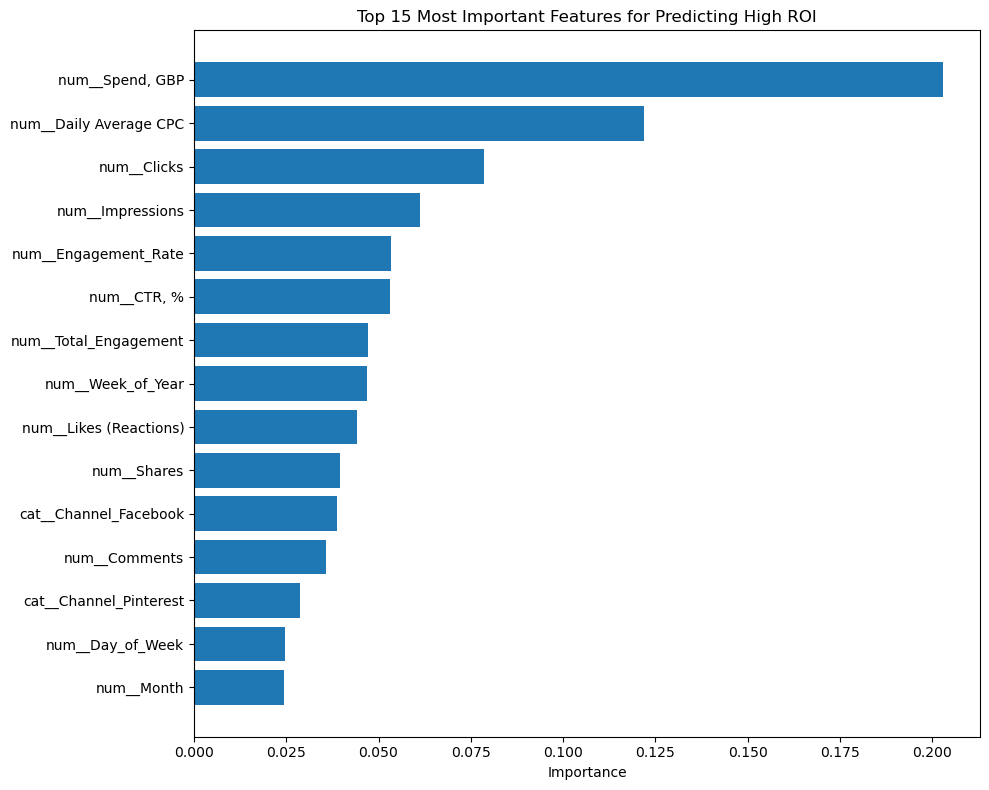

In [88]:
plt.figure(figsize=(10, 8))
top_15 = feature_importance_df.head(15)
plt.barh(range(len(top_15)), top_15['Importance'])
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features for Predicting High ROI')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [89]:
import joblib

In [90]:
joblib.dump(rfc_pipeline, 'rf=rfc_pipeline.pkl')

['rf=rfc_pipeline.pkl']

In [93]:
# Make predictions on full dataset
y_pred_full = rfc_pipeline.predict(X)
y_pred_proba_full = rfc_pipeline.predict_proba(X)[:, 1]

In [94]:
df_original = pd.read_excel('Marketing Campaign Dataset.xlsx')

In [95]:
df_original['Revenue'] = df_original['Total conversion value, GBP']
df_original['Profit'] = df_original['Revenue'] - df_original['Spend, GBP']
df_original['ROI_%'] = (df_original['Profit'] / df_original['Spend, GBP']) * 100
df_original['ROI_%'] = df_original['ROI_%'].replace([np.inf, -np.inf], 0)
df_original['High_ROI'] = (df_original['ROI_%'] > 1000).astype(int)

In [96]:
predictions_for_powerbi = pd.DataFrame({
    'Date': df_original['Date'],
    'Campaign': df_original['Campaign'],
    'Channel': df_original['Channel'],
    'Device': df_original['Device'],
    'Ad': df_original['Ad'],
    'City_Location': df_original['City/Location'],
    'Spend': df_original['Spend, GBP'],
    'Impressions': df_original['Impressions'],
    'Clicks': df_original['Clicks'],
    'CTR': df_original['CTR, %'],
    'CPC': df_original['Daily Average CPC'],
    'Conversions': df_original['Conversions'],
    'Revenue': df_original['Revenue'],
    'Profit': df_original['Profit'],
    'Actual_ROI_%': df_original['ROI_%'],
    'Actual_High_ROI': df_original['High_ROI'],  # Actual label (0 or 1)
    'Predicted_High_ROI': y_pred_full,  # Predicted label (0 or 1)
    'Prediction_Probability': y_pred_proba_full,  # Probability score (0-1)
    'Prediction_Correct': (df_original['High_ROI'] == y_pred_full).astype(int)  # Was prediction right?
})

In [97]:
def risk_category(prob):
    if prob >= 0.7:
        return 'High Probability (70%+)'
    elif prob >= 0.5:
        return 'Medium Probability (50-70%)'
    else:
        return 'Low Probability (<50%)'

predictions_for_powerbi['Prediction_Category'] = predictions_for_powerbi['Prediction_Probability'].apply(risk_category)

In [98]:
predictions_for_powerbi['Prediction_Label'] = predictions_for_powerbi['Predicted_High_ROI'].map({
    0: 'Low ROI Predicted',
    1: 'High ROI Predicted'
})

predictions_for_powerbi['Actual_Label'] = predictions_for_powerbi['Actual_High_ROI'].map({
    0: 'Low ROI Actual',
    1: 'High ROI Actual'
})

In [99]:
predictions_for_powerbi.to_csv('campaign_predictions_for_powerbi.csv', index=False)

In [100]:
accuracy_full = (predictions_for_powerbi['Prediction_Correct'].sum() / len(predictions_for_powerbi)) * 100
print(f"Overall Accuracy: {accuracy_full:.2f}%")

print("\nActual Distribution:")
print(predictions_for_powerbi['Actual_High_ROI'].value_counts())

print("\nPredicted Distribution:")
print(predictions_for_powerbi['Predicted_High_ROI'].value_counts())

print("\nProbability Categories:")
print(predictions_for_powerbi['Prediction_Category'].value_counts().sort_index())

print("\nSample Predictions (First 10):")
print(predictions_for_powerbi[['Campaign', 'Channel', 'Device', 'Actual_ROI_%', 
                                 'Actual_High_ROI', 'Predicted_High_ROI', 
                                 'Prediction_Probability', 'Prediction_Category']].head(10))


Overall Accuracy: 93.70%

Actual Distribution:
Actual_High_ROI
0    4981
1    4919
Name: count, dtype: int64

Predicted Distribution:
Predicted_High_ROI
0    5005
1    4895
Name: count, dtype: int64

Probability Categories:
Prediction_Category
High Probability (70%+)        4321
Low Probability (<50%)         4997
Medium Probability (50-70%)     582
Name: count, dtype: int64

Sample Predictions (First 10):
  Campaign   Channel   Device  Actual_ROI_%  Actual_High_ROI  \
0  Spring   Facebook  Desktop     81.290139                0   
1  Spring   Facebook  Desktop    290.196555                0   
2  Spring   Facebook  Desktop    748.768125                0   
3  Spring   Facebook  Desktop    238.399468                0   
4  Spring   Facebook  Desktop    467.484307                0   
5  Spring   Facebook  Desktop    278.429108                0   
6  Spring   Facebook  Desktop    -58.432931                0   
7  Spring   Facebook  Desktop    437.914211                0   
8  Spring   Fa